In [318]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [320]:
os.chdir('/content/gdrive/MyDrive/CourseDA')

In [321]:
os.listdir()

['healthcare-dataset-stroke-data.csv',
 'diabetes_prediction_dataset_.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'heart-dt.csv']

In [322]:
movies_data=pd.read_csv("movies_metadata.csv")

In [323]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [324]:
movies_data["release_date"]=pd.to_datetime(movies_data["release_date"])

In [325]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  bool          
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  int64         
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  int64         
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

In [326]:
movies_release=movies_data[(movies_data["status"]=="Released")].sort_values(["budget", "runtime", "revenue", "vote_average"], ascending=[False, False, False, False])

In [327]:
movies_release.duplicated().sum()

16

In [328]:
movies_release.drop_duplicates(inplace = True)

In [329]:
movies_release.isna().sum()

adult                        0
belongs_to_collection    40533
budget                       0
genres                       0
homepage                 37294
id                           0
imdb_id                     15
original_language           10
original_title               0
overview                   920
popularity                   0
poster_path                373
production_companies         0
production_countries         0
release_date                78
revenue                      0
runtime                    251
spoken_languages             0
status                       0
tagline                  24703
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [330]:
movies_release["belongs_to_collection"]=movies_release["belongs_to_collection"].fillna("No Data")
movies_release["homepage"]=movies_release["homepage"].fillna("No Data")
movies_release["tagline"]=movies_release["tagline"].fillna("No tagline")

In [331]:
movies_release.dropna(inplace=True)

In [332]:
movies_release.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [333]:
os.listdir()

['healthcare-dataset-stroke-data.csv',
 'diabetes_prediction_dataset_.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'heart-dt.csv']

In [334]:
rating=pd.read_csv("ratings_small.csv")

In [335]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [336]:
rating["timestamp"]=pd.to_datetime(rating["timestamp"], unit="s")

In [337]:
rating["timestamp"]

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

In [338]:
rating_movies=rating.groupby("movieId", as_index=False)["rating"].median()

In [339]:
movies_release=movies_release.merge(rating_movies,
                     left_on="id",
                     right_on="movieId",
                     how="inner")

In [340]:
movies_release

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,rating
0,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0,1865,3.50
1,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0,285,4.00
2,True,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,5.9,3687.0,559,5.00
3,True,"{'id': 1241, 'name': 'Harry Potter Collection'...",250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,767,tt0417741,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",...,153.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,False,7.4,5435.0,767,4.00
4,True,"{'id': 420, 'name': 'The Chronicles of Narnia ...",225000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",No Data,2454,tt0499448,en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,...,150.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,False,6.3,1668.0,2454,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,True,No Data,0,[],No Data,33495,tt1056471,en,2061 - Un anno eccezionale,No overview found.,...,0.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,No tagline,2061 - Un anno eccezionale,False,3.3,20.0,33495,2.75
2789,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,41863,tt1223379,ja,Sundome,Hideo Aiba (Atsuji Ninomiya) is a reserved and...,...,0.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,No tagline,Sundome,False,0.0,0.0,41863,3.75
2790,True,No Data,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",No Data,26599,tt0104149,en,Duel of Hearts,Lady Caroline Faye meets Lord Vane Brecon and ...,...,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No tagline,Duel of Hearts,False,0.0,0.0,26599,5.00
2791,True,No Data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,64501,tt1363125,hi,Naughty @ 40,Laxminarayan Kapoor lives a wealthy lifestyle ...,...,0.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,No tagline,Naughty @ 40,False,0.0,0.0,64501,4.50


In [341]:
movies_release["profit"]=movies_release["revenue"].sub(movies_release["budget"])

In [342]:
movies_release[["original_title", "profit", "revenue", "runtime", "vote_average", "rating"]].sort_values("profit", ascending=False)

,original_title,profit,revenue,runtime,vote_average,rating
6,Titanic,1.645034e+09,1.845034e+09,194.0,7.5,3.0
95,The Lord of the Rings: The Return of the King,1.024889e+09,1.118889e+09,201.0,8.1,3.0
7,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08,1.065660e+09,151.0,7.0,4.0
190,Jurassic Park,8.571000e+08,9.201000e+08,127.0,7.6,3.0
52,Harry Potter and the Philosopher's Stone,8.514756e+08,9.764756e+08,152.0,7.5,4.0
...,...,...,...,...,...,...
152,Inspector Gadget,-7.500000e+07,0.000000e+00,78.0,4.3,3.0
112,Arthur et la vengeance de Maltazard,-8.700000e+07,0.000000e+00,93.0,5.3,4.5
92,Cutthroat Island,-8.798268e+07,1.001732e+07,119.0,5.7,4.0
98,Metropolis,-9.196958e+07,6.504220e+05,153.0,8.0,3.0


In [343]:
movies_release["movies_hight_duration"]=(movies_release["runtime"]>=60*3).astype("int")

In [344]:
movies_release[movies_release["movies_hight_duration"]==1]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,movieId,rating,profit,movies_hight_duration
5,True,No Data,207000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,254,tt0360717,en,King Kong,"In 1933 New York, an overly ambitious movie pr...",...,Released,The eighth wonder of the world.,King Kong,False,6.6,2403.0,254,3.00,3.430000e+08,1
6,True,No Data,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,597,3.00,1.645034e+09,1
95,True,"{'id': 119, 'name': 'The Lord of the Rings Col...",94000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net,122,tt0167260,en,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,...,Released,The eye of the enemy is moving.,The Lord of the Rings: The Return of the King,False,8.1,8226.0,122,3.00,1.024889e+09,1
194,True,No Data,60000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",http://thegreenmile.warnerbros.com/,497,tt0120689,en,The Green Mile,A supernatural tale set on death row in a Sout...,...,Released,Miracles do happen.,The Green Mile,False,8.2,4166.0,497,4.00,2.246000e+08,1
318,True,No Data,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",No Data,820,tt0102138,en,JFK,New Orleans District Attorney Jim Garrison dis...,...,Released,The story that won’t go away.,JFK,False,7.5,513.0,820,5.00,1.654055e+08,1
357,True,No Data,37000000,"[{'id': 18, 'name': 'Drama'}]",http://www.magnoliamovie.com/,334,tt0175880,en,Magnolia,An epic mosaic of many interrelated characters...,...,Released,Things fall down. People look up. And when it ...,Magnolia,False,7.5,844.0,334,4.00,1.145180e+07,1
387,True,No Data,34000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No Data,1883,tt0104797,en,Malcolm X,The biopic of the controversial and influentia...,...,Released,No tagline,Malcolm X,False,7.3,377.0,1883,4.00,1.416991e+07,1
534,True,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,424,3.50,2.993656e+08,1
535,True,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No Data,783,tt0083987,en,Gandhi,"In the early years of the 20th century, Mohand...",...,Released,His triumph changed the world forever.,Gandhi,False,7.4,730.0,783,3.50,5.573789e+07,1
536,True,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,Released,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0,581,4.00,4.022088e+08,1


In [345]:
movies_release["movies_length_title"]=movies_release["original_title"].str.len()

In [346]:
movies_release[movies_release["movies_length_title"]<5]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,movieId,rating,profit,movies_hight_duration,movies_length_title
42,True,No Data,137000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",No Data,1927,tt0286716,en,Hulk,"Bruce Banner, a genetics researcher with a tra...",...,Unleash the hero within,Hulk,False,5.3,1571.0,1927,4.75,108360480.0,0,4
60,True,"{'id': 87118, 'name': 'Cars Collection', 'post...",120000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://disney.go.com/disneyvideos/animatedfilm...,920,tt0317219,en,Cars,"Lightning McQueen, a hotshot rookie race car d...",...,Ahhh... it's got that new movie smell.,Cars,False,6.6,3991.0,920,4.00,341983149.0,0,4
131,True,No Data,80000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",No Data,6522,tt0123964,en,Life,Two men in 1930s Mississippi become friends af...,...,Share it with someone you love.,Life,False,6.4,179.0,6522,3.00,-6654971.0,0,4
158,True,No Data,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No Data,879,tt0102057,en,Hook,The boy who wasn't supposed to grow up—Peter P...,...,What if Peter Pan grew up?,Hook,False,6.7,1563.0,879,3.00,230854823.0,0,4
163,True,"{'id': 52785, 'name': 'xXx Collection', 'poste...",70000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/xxx/,7451,tt0295701,en,xXx,Xander Cage is your standard adrenaline junkie...,...,A New Breed Of Secret Agent.,xXx,False,5.8,1454.0,7451,3.50,207448382.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,True,No Data,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",No Data,107412,tt0091957,en,Silk,"Silk, the toughest cop in Honolulu, busts smal...",...,When the heat's on no one's smoother than...,Silk,False,4.3,2.0,107412,5.00,0.0,0,4
2625,True,"{'id': 294834, 'name': 'Vixens Collection', 'p...",0,"[{'id': 35, 'name': 'Comedy'}]",No Data,5651,tt0075376,en,Up!,Up! is a 1976 soft core sex comedy film direct...,...,If you don't see Up! … you'll feel down!,Up!,False,5.6,27.0,5651,3.00,0.0,0,3
2675,True,No Data,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",No Data,134569,tt2408288,en,Jib,The Korean Academy of Film Arts has produced a...,...,No tagline,The House,False,7.1,4.0,134569,3.50,0.0,0,3
2735,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,127728,tt2048688,en,8:46,A glimpse into the lives of an ensemble of cha...,...,Never Forget,8:46,False,6.5,4.0,127728,5.00,0.0,0,4


In [347]:
movies_release["years_movies"]=movies_release["release_date"].dt.year

In [348]:
movies_years=movies_release.groupby("years_movies").size()

In [349]:
movies_years.sort_values(ascending=False)

years_movies
2006    150
2007    144
2005    116
2004    111
2001     97
       ... 
1911      1
1910      1
1903      1
1902      1
2015      1
Length: 104, dtype: int64

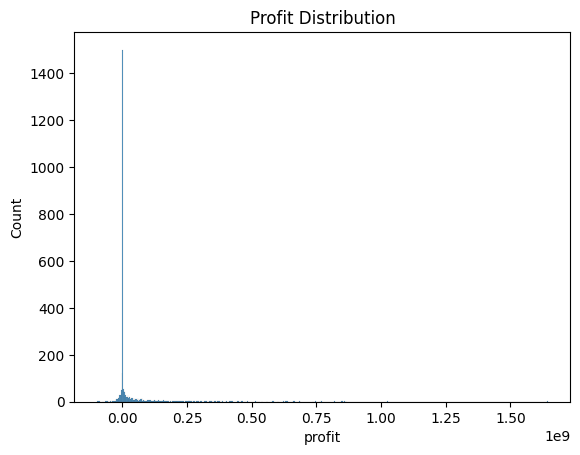

In [350]:
sns.histplot(data=movies_release, x="profit")
plt.title("Profit Distribution")
plt.show()

In [351]:
movies_profit=movies_release[movies_release["profit"]>3]

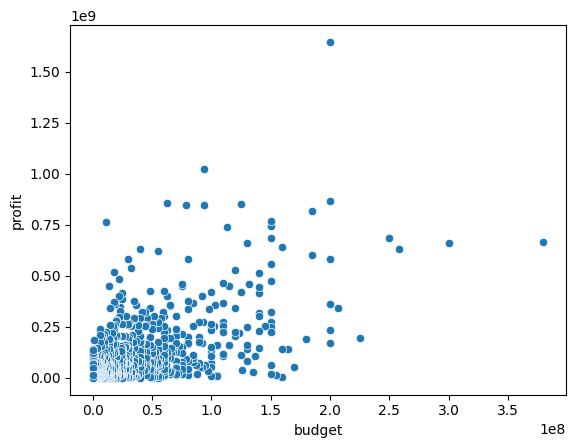

In [352]:
sns.scatterplot(data=movies_profit,
                x="budget",
                y="profit")
plt.show()

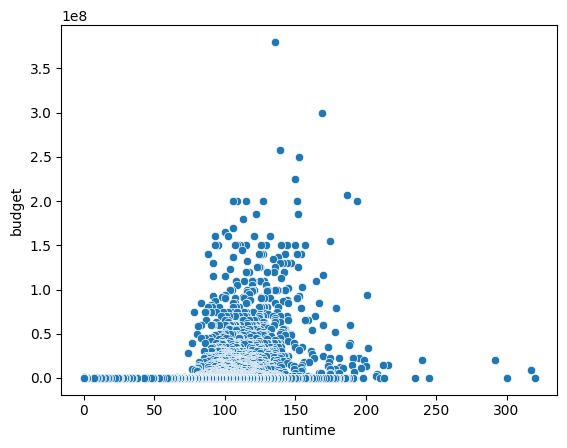

In [353]:
sns.scatterplot(data=movies_release,
                x="runtime",
                y="budget")
plt.show()

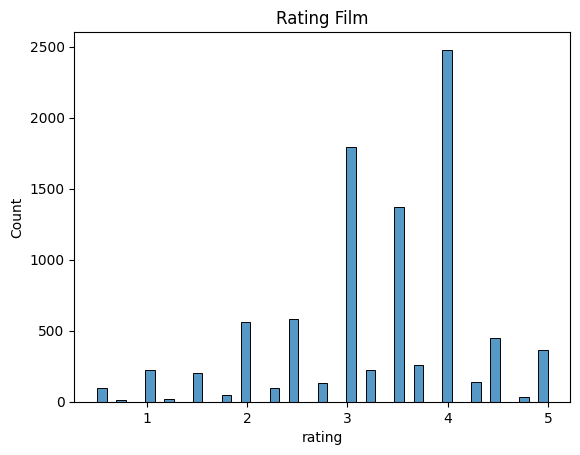

In [354]:
sns.histplot(data=rating_movies, x="rating")
plt.title("Rating Film")
plt.show()

In [355]:
rating_movies["good_movies"]=rating_movies["rating"]>3

In [356]:
movies_release_new=movies_profit.merge(rating_movies,
                     left_on="id",
                     right_on="movieId",
                     how="inner")

<Axes: xlabel='profit', ylabel='Count'>

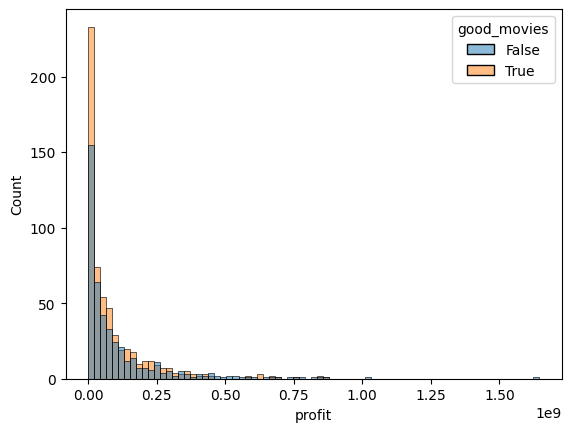

In [357]:
sns.histplot(data=movies_release_new,
             x="profit",
             hue="good_movies")

In [358]:
movies_release_new.select_dtypes(include="number")

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movieId_x,rating_x,profit,movies_hight_duration,movies_length_title,years_movies,movieId_y,rating_y
0,380000000,1865,27.887720,1.045714e+09,136.0,6.4,5068.0,1865,3.50,665713802.0,0,43,2011,1865,3.50
1,300000000,285,31.363664,9.610000e+08,169.0,6.9,4627.0,285,4.00,661000000.0,0,40,2007,285,4.00
2,258000000,559,27.614265,8.908716e+08,139.0,5.9,3687.0,559,5.00,632871626.0,0,12,2007,559,5.00
3,250000000,767,19.083723,9.339592e+08,153.0,7.4,5435.0,767,4.00,683959197.0,0,38,2009,767,4.00
4,225000000,2454,12.490891,4.196514e+08,150.0,6.3,1668.0,2454,3.75,194651413.0,0,40,2008,2454,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,0,26391,1.679042,3.662459e+06,80.0,4.9,28.0,26391,2.00,3662459.0,0,9,1994,26391,2.00
1027,0,3134,12.589992,9.409440e+05,77.0,4.2,75.0,3134,5.00,940944.0,0,9,2000,3134,5.00
1028,0,33838,0.803093,2.608000e+06,75.0,4.6,5.0,33838,3.50,2608000.0,0,38,1987,33838,3.50
1029,0,5729,2.761450,7.940000e+03,63.0,6.7,53.0,5729,2.50,7940.0,0,10,1930,5729,2.50


In [359]:
def select_columns(df: pd.DataFrame, features: list, target: list = "rating_x"):
  X = df[features]
  y = (df[target]>3).astype("int")
  return X, y

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
features=["budget", "popularity", "runtime", "vote_average"]
X, y = select_columns(movies_release_new, features=features)

In [362]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [363]:
X_train

,budget,popularity,runtime,vote_average
631,7000000,5.579088,92.0,6.3
81,100000000,17.319836,119.0,5.6
526,15000000,12.884191,100.0,6.5
832,450000,2.493289,89.0,6.7
907,0,7.400261,115.0,7.4
...,...,...,...,...
87,94000000,29.324358,201.0,8.1
330,31000000,10.257210,91.0,6.6
466,19000000,11.649588,141.0,7.2
121,75000000,8.635464,121.0,6.7


In [364]:
from sklearn.preprocessing import MinMaxScaler

In [365]:
minmax=MinMaxScaler()

In [366]:
minmax.fit(X_train)

MinMaxScaler()

In [367]:
X_train_scaled=minmax.transform(X_train)
X_test_scaled=minmax.transform(X_test)

In [372]:
def scaling(df, scaler):
  scaled_array=scaler.transform(df)
  scaled_df=pd.DataFrame(scaled_array, columns=minmax.get_feature_names_out())
  return scaled_df

In [373]:
X_train_scaled=scaling(X_train, minmax)
X_test_scaled=scaling(X_test, minmax)

In [374]:
X_train_scaled

,budget,popularity,runtime,vote_average
0,0.018421,0.039582,0.194631,0.741176
1,0.263158,0.122879,0.375839,0.658824
2,0.039474,0.091409,0.248322,0.764706
3,0.001184,0.017689,0.174497,0.788235
4,0.000000,0.052503,0.348993,0.870588
...,...,...,...,...
716,0.247368,0.208048,0.926174,0.952941
717,0.081579,0.072772,0.187919,0.776471
718,0.050000,0.082650,0.523490,0.847059
719,0.197368,0.061266,0.389262,0.788235
